<a href="https://colab.research.google.com/github/Sana-Shah-een/Artificial_Intelligence/blob/main/10_Top1000WealthiestPeopleEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install numpy
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/Top_1000_wealthiest_people.csv')
df.head()

,Name,Country,Industry,Net Worth (in billions),Company
0,Rob Walton,Mexico,Finance,8.50,Walmart
1,Sergey Brin,USA,Automotive,44.76,Google
2,Steve Ballmer,USA,Manufacturing,13.43,Koch Industries
3,Mukesh Ambani,USA,Technology,120.44,Google
4,Jim Walton,USA,Fashion,122.39,Walmart


In [4]:
df.rename(columns={'Net Worth (in billions)': 'net_worth'},inplace=True)


In [5]:
df.head()

,Name,Country,Industry,net_worth,Company
0,Rob Walton,Mexico,Finance,8.50,Walmart
1,Sergey Brin,USA,Automotive,44.76,Google
2,Steve Ballmer,USA,Manufacturing,13.43,Koch Industries
3,Mukesh Ambani,USA,Technology,120.44,Google
4,Jim Walton,USA,Fashion,122.39,Walmart


In [6]:
df.shape


(1000, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       1000 non-null   object 
 1   Country    1000 non-null   object 
 2   Industry   1000 non-null   object 
 3   net_worth  1000 non-null   float64
 4   Company    1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [9]:
df.isna().sum()

,0
Name,0
Country,0
Industry,0
net_worth,0
Company,0


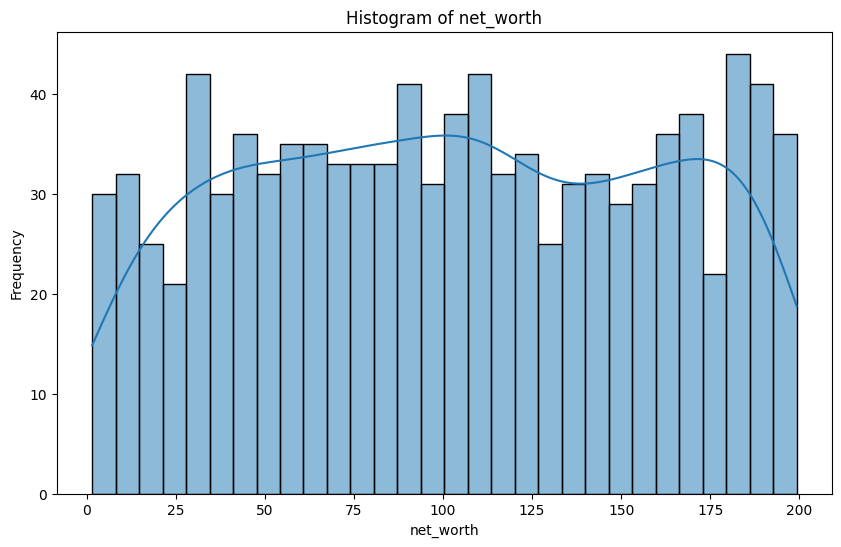

In [10]:
# Plot histogram for each numerical feature
import matplotlib.pyplot as plt
import seaborn as sns
numeric_features = [ 'net_worth']

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [12]:
top_10_richest = df.nlargest(10,"net_worth")
top_10_richest

,Name,Country,Industry,net_worth,Company
616,Steve Ballmer,USA,Retail,199.24,Facebook
584,Larry Ellison,USA,Finance,199.21,Grupo Carso
115,Amancio Ortega,France,Retail,199.20,L'Oreal
913,Alice Walton,USA,Technology,199.10,Microsoft
91,Larry Ellison,USA,Manufacturing,199.00,Walmart
667,Mukesh Ambani,India,Manufacturing,198.77,Microsoft
915,Bernard Arnault,USA,Retail,198.34,Oracle
377,Sergey Brin,India,Technology,198.05,Walmart
962,Carlos Slim,USA,Petrochemicals,198.05,Microsoft
376,Jeff Bezos,Mexico,Petrochemicals,197.60,Walmart


<ipython-input-13-2bc9f16942ab>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=industry_count.index ,x=industry_count.values, palette='cividis')


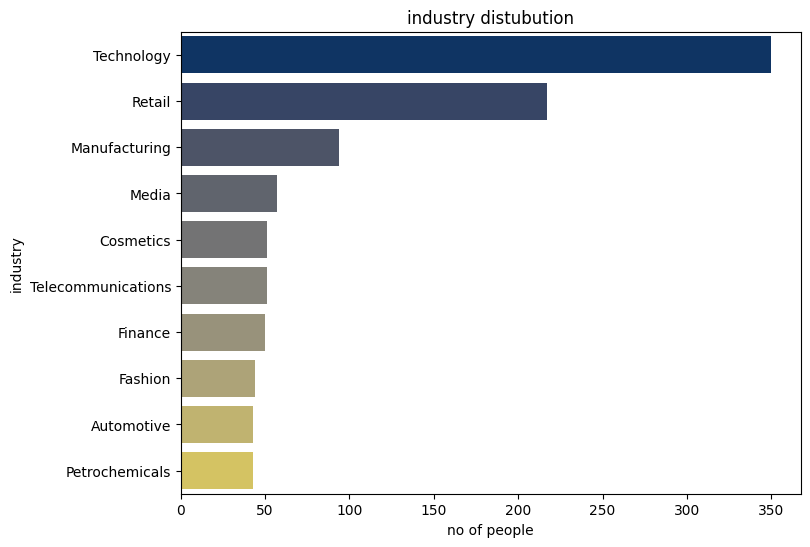

In [13]:
# Plot the distribution of industries
plt.figure(figsize=(8,6))
industry_count = df['Industry'].value_counts()
sns.barplot(y=industry_count.index ,x=industry_count.values, palette='cividis')
plt.title('industry distubution')
plt.xlabel('no of people')
plt.ylabel('industry')
plt.show()


<ipython-input-14-ad3f6402f4ec>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_count.index,x=country_count.values,palette='cividis')


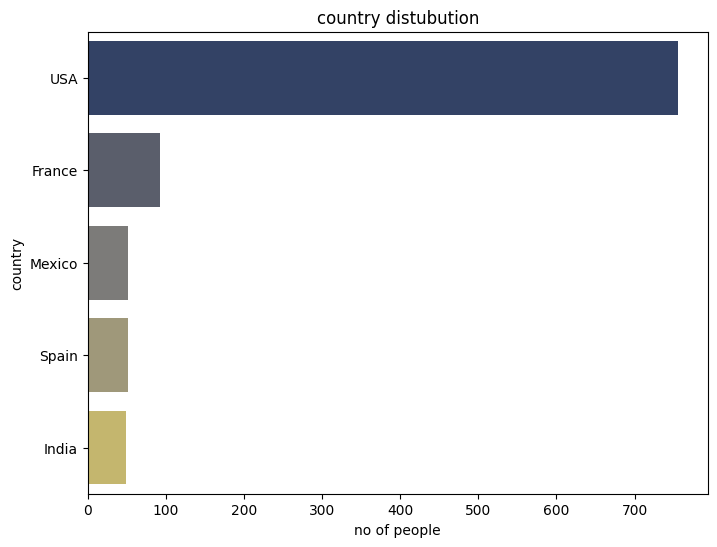

In [14]:
# Plot the distribution of countries
plt.figure(figsize=(8,6))
country_count=df['Country'].value_counts().head(10)
sns.barplot(y=country_count.index,x=country_count.values,palette='cividis')
plt.title('country distubution')
plt.xlabel('no of people')
plt.ylabel('country')
plt.show()

<ipython-input-15-79add7ef890c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=industry_net_worth.index,x=industry_net_worth.values,palette='viridis')


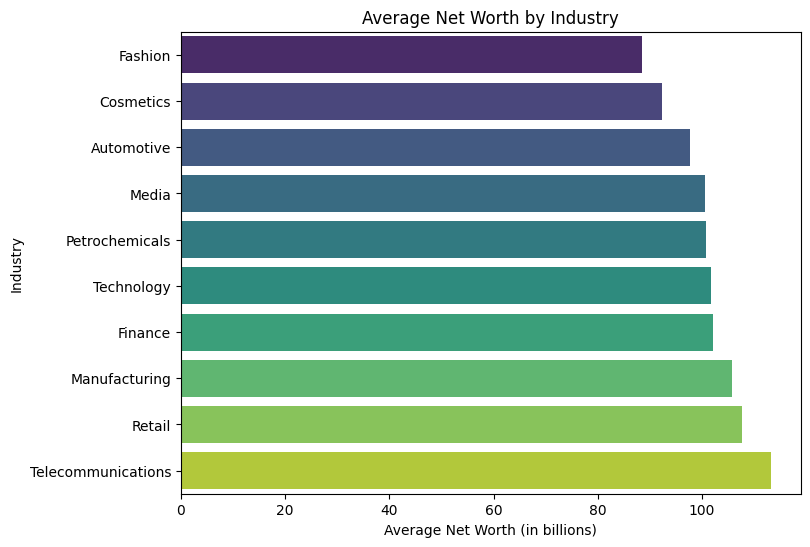

In [15]:
# Plot average net worth by industry
plt.figure(figsize=(8,6))
industry_net_worth=df.groupby('Industry')['net_worth'].mean().sort_values()
sns.barplot(y=industry_net_worth.index,x=industry_net_worth.values,palette='viridis')
plt.title('Average Net Worth by Industry')
plt.xlabel('Average Net Worth (in billions)')
plt.ylabel('Industry')
plt.show()

<ipython-input-16-a5f26d8c006b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_net_worth.index,x=country_net_worth.values,palette='plasma')


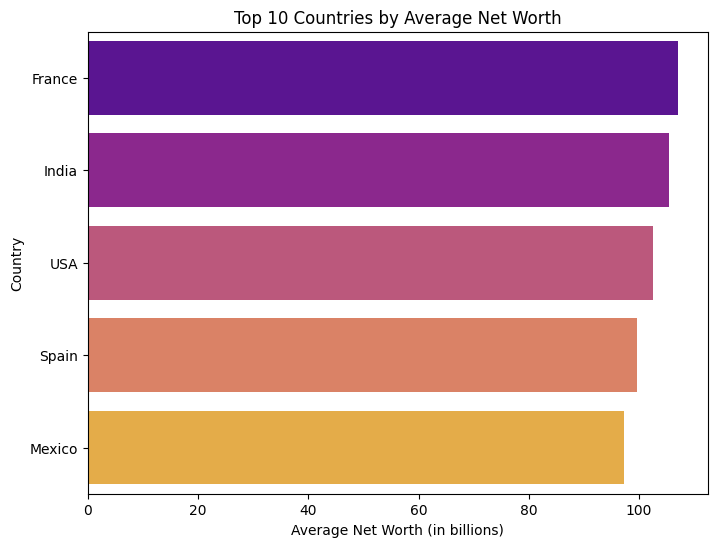

In [16]:
# Plot average net worth by country
plt.figure(figsize=(8,6))
country_net_worth=df.groupby('Country')['net_worth'].mean().sort_values(ascending=False)
sns.barplot(y=country_net_worth.index,x=country_net_worth.values,palette='plasma')
plt.title('Top 10 Countries by Average Net Worth')
plt.xlabel('Average Net Worth (in billions)')
plt.ylabel('Country')
plt.show()

<ipython-input-17-d3161c09f857>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_companies.index, x=top_companies.values, palette='cubehelix')


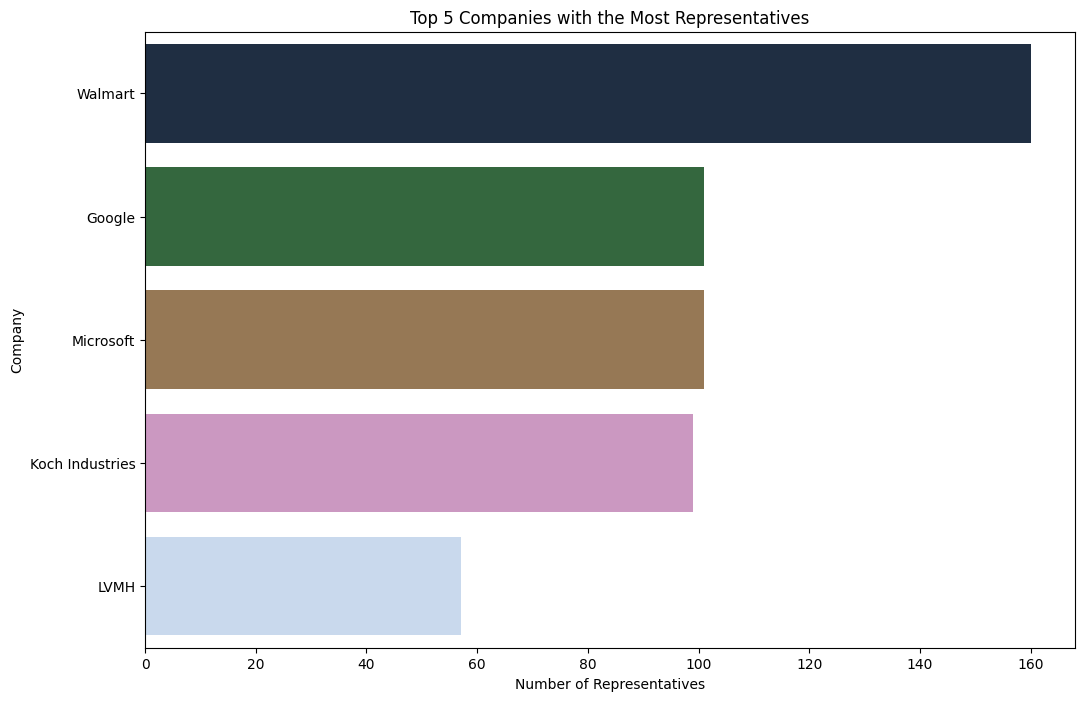

In [17]:
# Plot the top 5 companies with the most representatives
plt.figure(figsize=(12, 8))
top_companies = df['Company'].value_counts().head(5)
sns.barplot(y=top_companies.index, x=top_companies.values, palette='cubehelix')
plt.title('Top 5 Companies with the Most Representatives')
plt.xlabel('Number of Representatives')
plt.ylabel('Company')
plt.show()


<ipython-input-18-9d1be81ebe0a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_companies.index, x=top_companies.values, palette='cubehelix')


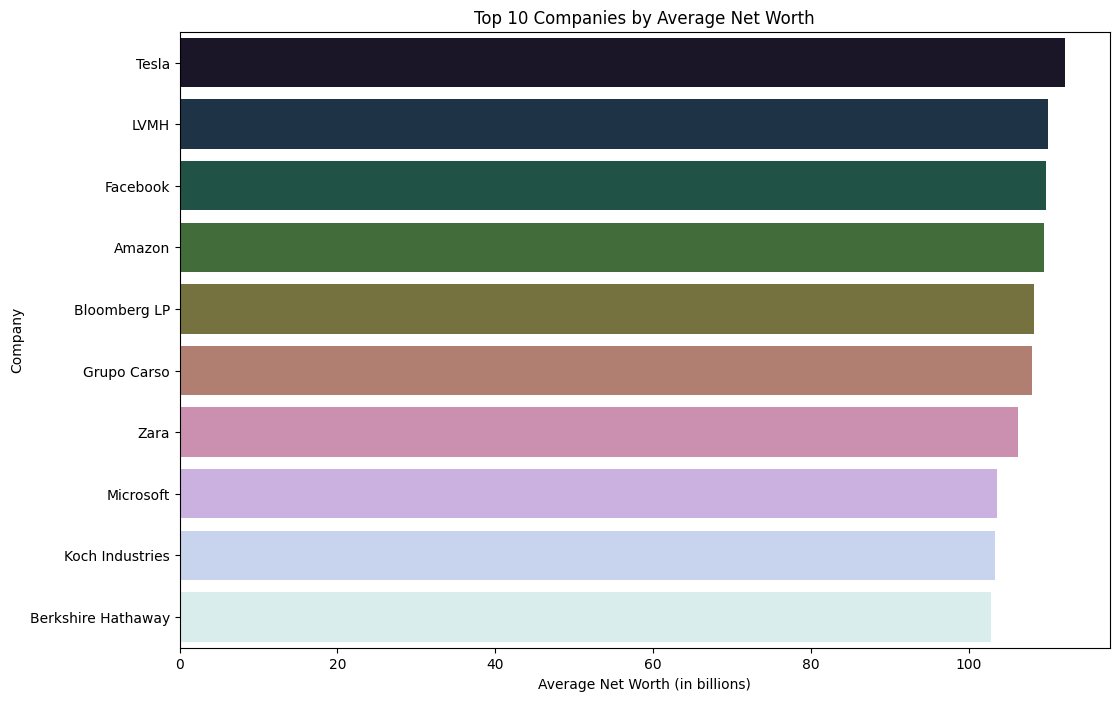

In [18]:
# Calculate average net worth by company
top_companies = df.groupby('Company')['net_worth'].mean().sort_values(ascending=False).head(10)

# Plot the top 10 companies by average net worth
plt.figure(figsize=(12, 8))
sns.barplot(y=top_companies.index, x=top_companies.values, palette='cubehelix')
plt.title('Top 10 Companies by Average Net Worth')
plt.xlabel('Average Net Worth (in billions)')
plt.ylabel('Company')
plt.show()